In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [25]:
df = pd.read_csv("hf://datasets/yvonne90190/NBA_salary_advanced_stats/NBA_Data.csv")

In [26]:
df.head()

,player,team,POS,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FT%,REB,AST,STL,BLK,TO,DD2,TD3,year,salary
0,Luka Doncic,DAL,PG,70,37.5,33.9,11.5,23.6,48.7,4.1,...,78.6,9.2,9.8,1.4,0.5,4.0,49,21,2023,40064220
1,Giannis Antetokounmpo,MIL,PF,73,35.2,30.4,11.5,18.8,61.1,0.5,...,65.7,11.5,6.5,1.2,1.1,3.4,57,10,2023,45640084
2,Shai Gilgeous-Alexander,OKC,PG,75,34.0,30.1,10.6,19.8,53.5,1.3,...,87.4,5.5,6.2,2.0,0.9,2.2,8,0,2023,33386850
3,Jalen Brunson,NY,PG,77,35.4,28.7,10.3,21.4,47.9,2.7,...,84.7,3.6,6.7,0.9,0.2,2.4,9,0,2023,26346666
4,Kevin Durant,PHX,PF,75,37.2,27.1,10.0,19.1,52.3,2.2,...,85.6,6.6,5.0,0.9,1.2,3.3,14,1,2023,47649433


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9130 entries, 0 to 9129
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   player  9130 non-null   object 
 1   team    9130 non-null   object 
 2   POS     9123 non-null   object 
 3   GP      9130 non-null   int64  
 4   MIN     9130 non-null   float64
 5   PTS     9130 non-null   float64
 6   FGM     9130 non-null   float64
 7   FGA     9130 non-null   float64
 8   FG%     9130 non-null   float64
 9   3PM     9130 non-null   float64
 10  3PA     9130 non-null   float64
 11  3P%     9130 non-null   float64
 12  FTM     9130 non-null   float64
 13  FTA     9130 non-null   float64
 14  FT%     9130 non-null   float64
 15  REB     9130 non-null   float64
 16  AST     9130 non-null   float64
 17  STL     9130 non-null   float64
 18  BLK     9130 non-null   float64
 19  TO      9130 non-null   float64
 20  DD2     9130 non-null   int64  
 21  TD3     9130 non-null   int64  
 22  

In [28]:
df.isnull().sum()

,0
player,0
team,0
POS,7
GP,0
MIN,0
PTS,0
FGM,0
FGA,0
FG%,0
3PM,0


In [29]:
df['POS'] = df['POS'].fillna(df['POS'].mode()[0])

In [30]:
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns to encode:", list(categorical_cols))

Categorical columns to encode: ['player', 'team', 'POS']


In [31]:
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    print(f"Column '{col}' encoded successfully.")
print("Dataframe after encoding categorical features:")
df.head()

Column 'player' encoded successfully.
Column 'team' encoded successfully.
Column 'POS' encoded successfully.
Dataframe after encoding categorical features:


,player,team,POS,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FT%,REB,AST,STL,BLK,TO,DD2,TD3,year,salary
0,1137,108,5,70,37.5,33.9,11.5,23.6,48.7,4.1,...,78.6,9.2,9.8,1.4,0.5,4.0,49,21,2023,40064220
1,628,247,4,73,35.2,30.4,11.5,18.8,61.1,0.5,...,65.7,11.5,6.5,1.2,1.1,3.4,57,10,2023,45640084
2,1571,333,5,75,34.0,30.1,10.6,19.8,53.5,1.3,...,87.4,5.5,6.2,2.0,0.9,2.2,8,0,2023,33386850
3,748,321,5,77,35.4,28.7,10.3,21.4,47.9,2.7,...,84.7,3.6,6.7,0.9,0.2,2.4,9,0,2023,26346666
4,1033,362,4,75,37.2,27.1,10.0,19.1,52.3,2.2,...,85.6,6.6,5.0,0.9,1.2,3.3,14,1,2023,47649433


In [32]:
salary_correlations = df.corr()['salary'].sort_values(ascending=False)
print("Correlations with 'salary':\n", salary_correlations)

Correlations with 'salary':
 salary    1.000000
PTS       0.625991
FGM       0.618902
FGA       0.594429
FTM       0.544153
FTA       0.534937
MIN       0.527728
TO        0.522492
AST       0.470843
REB       0.454191
DD2       0.422183
3PA       0.405568
3PM       0.401306
STL       0.383317
TD3       0.263618
BLK       0.257643
year      0.224968
GP        0.218478
FT%       0.184109
FG%       0.148847
3P%       0.131661
POS       0.039196
team     -0.016219
player   -0.021623
Name: salary, dtype: float64


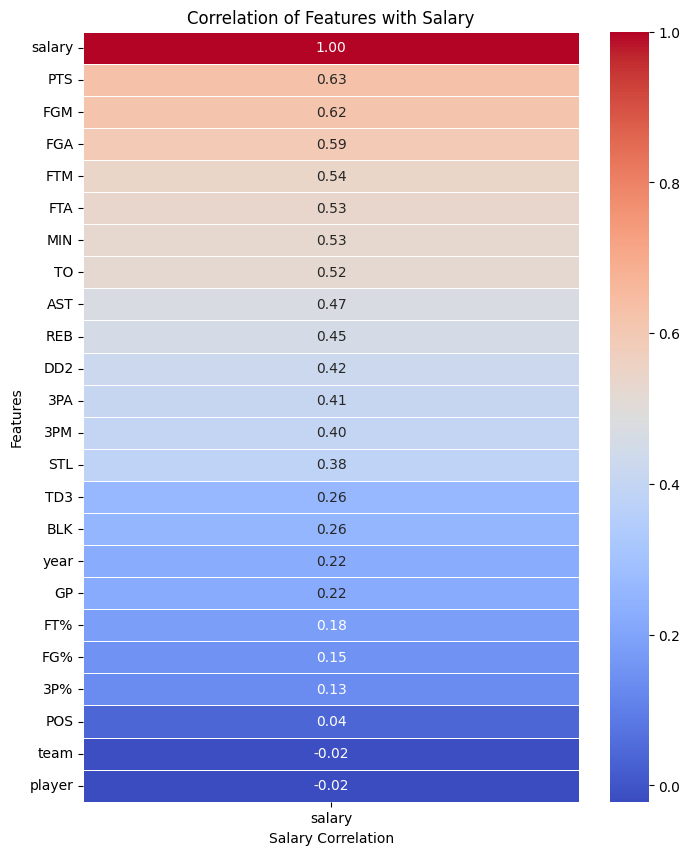

In [33]:
plt.figure(figsize=(8, 10))
sns.heatmap(salary_correlations.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation of Features with Salary')
plt.ylabel('Features')
plt.xlabel('Salary Correlation')
plt.show()

In [34]:
X = df.drop('salary', axis=1)
y = df['salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data preparation complete. X, y, X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled are ready.")

Data preparation complete. X, y, X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled are ready.


In [35]:
model_performance = {}

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)

r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

print(f"Linear Regression R-squared: {r2_lr:.4f}")
print(f"Linear Regression MAE: {mae_lr:.2f}")
print(f"Linear Regression MSE: {mse_lr:.2f}")

model_performance['Linear Regression'] = {'R-squared': r2_lr, 'MAE': mae_lr, 'MSE': mse_lr}

Linear Regression R-squared: 0.5228
Linear Regression MAE: 3457584.01
Linear Regression MSE: 25586257242626.56
Linear Regression model trained and evaluated. Metrics stored in model_performance.


In [36]:
ridge_model = Ridge(random_state=42)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print(f"Ridge Regression R-squared: {r2_ridge:.4f}")
print(f"Ridge Regression MAE: {mae_ridge:.2f}")
print(f"Ridge Regression MSE: {mse_ridge:.2f}")

model_performance['Ridge Regression'] = {'R-squared': r2_ridge, 'MAE': mae_ridge, 'MSE': mse_ridge}

Ridge Regression R-squared: 0.5226
Ridge Regression MAE: 3457553.45
Ridge Regression MSE: 25596812008939.71
Ridge Regression model trained and evaluated. Metrics stored in model_performance.


In [37]:
lasso_model = Lasso(random_state=42)
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)

r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print(f"Lasso Regression R-squared: {r2_lasso:.4f}")
print(f"Lasso Regression MAE: {mae_lasso:.2f}")
print(f"Lasso Regression MSE: {mse_lasso:.2f}")

model_performance['Lasso Regression'] = {'R-squared': r2_lasso, 'MAE': mae_lasso, 'MSE': mse_lasso}

Lasso Regression R-squared: 0.5231
Lasso Regression MAE: 3456994.34
Lasso Regression MSE: 25571630957666.01
Lasso Regression model trained and evaluated. Metrics stored in model_performance.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.826e+16, tolerance: 3.460e+13
  model = cd_fast.enet_coordinate_descent(


In [38]:
lasso_model = Lasso(random_state=42, max_iter=10000)
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)

r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print(f"Lasso Regression R-squared: {r2_lasso:.4f}")
print(f"Lasso Regression MAE: {mae_lasso:.2f}")
print(f"Lasso Regression MSE: {mse_lasso:.2f}")

model_performance['Lasso Regression'] = {'R-squared': r2_lasso, 'MAE': mae_lasso, 'MSE': mse_lasso}

Lasso Regression R-squared: 0.5228
Lasso Regression MAE: 3457455.30
Lasso Regression MSE: 25583393747110.85
Lasso Regression model trained and evaluated. Metrics stored in model_performance.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.647e+16, tolerance: 3.460e+13
  model = cd_fast.enet_coordinate_descent(


In [39]:
lasso_model = Lasso(random_state=42, max_iter=100000)
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)

r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print(f"Lasso Regression R-squared: {r2_lasso:.4f}")
print(f"Lasso Regression MAE: {mae_lasso:.2f}")
print(f"Lasso Regression MSE: {mse_lasso:.2f}")

model_performance['Lasso Regression'] = {'R-squared': r2_lasso, 'MAE': mae_lasso, 'MSE': mse_lasso}

Lasso Regression R-squared: 0.5228
Lasso Regression MAE: 3457583.00
Lasso Regression MSE: 25586260577238.93
Lasso Regression model trained and evaluated. Metrics stored in model_performance.


In [40]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f"Random Forest Regression R-squared: {r2_rf:.4f}")
print(f"Random Forest Regression MAE: {mae_rf:.2f}")
print(f"Random Forest Regression MSE: {mse_rf:.2f}")

model_performance['Random Forest Regression'] = {'R-squared': r2_rf, 'MAE': mae_rf, 'MSE': mse_rf}

Random Forest Regression R-squared: 0.6179
Random Forest Regression MAE: 3055185.02
Random Forest Regression MSE: 20486786655248.98
Random Forest Regression model trained and evaluated. Metrics stored in model_performance.


In [41]:
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train_scaled, y_train)
y_pred_gbr = gbr_model.predict(X_test_scaled)

r2_gbr = r2_score(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)

print(f"Gradient Boosting Regression R-squared: {r2_gbr:.4f}")
print(f"Gradient Boosting Regression MAE: {mae_gbr:.2f}")
print(f"Gradient Boosting Regression MSE: {mse_gbr:.2f}")

model_performance['Gradient Boosting Regression'] = {'R-squared': r2_gbr, 'MAE': mae_gbr, 'MSE': mse_gbr}

Gradient Boosting Regression R-squared: 0.6115
Gradient Boosting Regression MAE: 3071421.38
Gradient Boosting Regression MSE: 20828285706910.63
Gradient Boosting Regression model trained and evaluated. Metrics stored in model_performance.


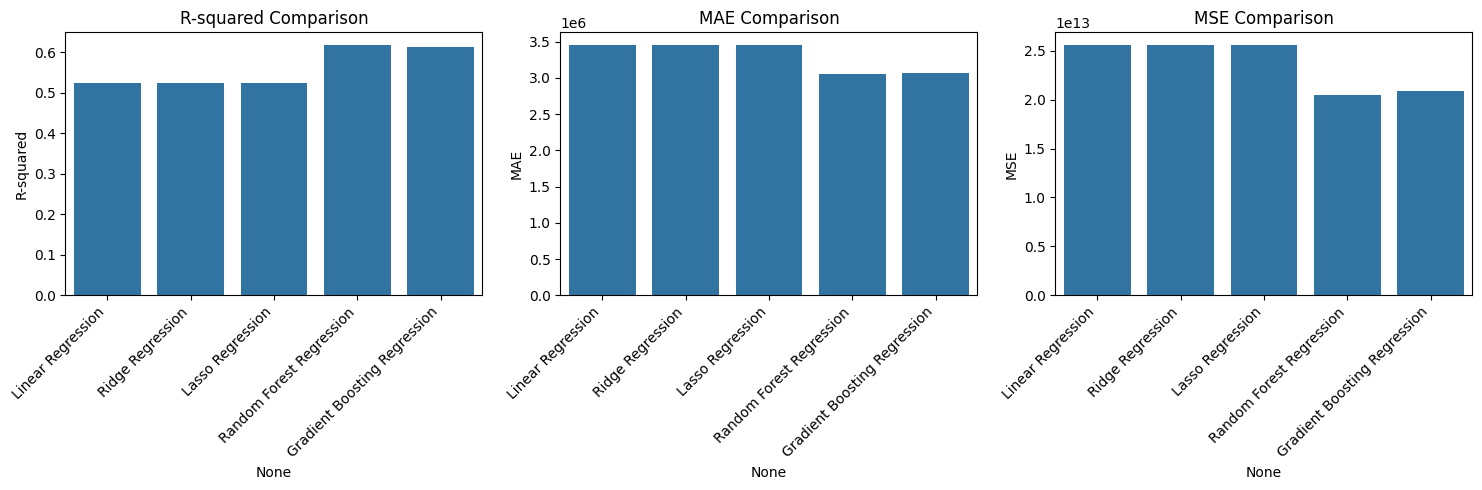

In [42]:
model_performance_df = pd.DataFrame(model_performance).T

plt.figure(figsize=(15, 5))

# Plot R-squared
plt.subplot(1, 3, 1)
sns.barplot(x=model_performance_df.index, y=model_performance_df['R-squared'])
plt.title('R-squared Comparison')
plt.ylabel('R-squared')
plt.xticks(rotation=45, ha='right')

# Plot MAE
plt.subplot(1, 3, 2)
sns.barplot(x=model_performance_df.index, y=model_performance_df['MAE'])
plt.title('MAE Comparison')
plt.ylabel('MAE')
plt.xticks(rotation=45, ha='right')

# Plot MSE
plt.subplot(1, 3, 3)
sns.barplot(x=model_performance_df.index, y=model_performance_df['MSE'])
plt.title('MSE Comparison')
plt.ylabel('MSE')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()